# Lets import the test set & take a quick look at the data structure

In [1]:
import pandas as pd

test_url = "https://raw.githubusercontent.com/momokamalz/MachineLearning/main/TermProject/Test.csv"
test_data = pd.read_csv(test_url)
test_data.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [2]:
test_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


# lets load the train set and take a quick look at the data structure

In [4]:
url = "https://raw.githubusercontent.com/momokamalz/MachineLearning/main/TermProject/Train.csv"
col_names = ['id', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']
data = pd.read_csv(url, sep=',')

In [5]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
test_data.shape

(2627, 10)

# Lets combine the two sets together to get a complete picture

In [7]:
combined_data = pd.concat([data, test_data])

In [8]:
combined_data.shape

(10695, 11)

## looking for missing values:

In [9]:
combined_data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64

In [10]:
combined_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### customer ID is a unique number and as such should not be duplicated 

### looks like we have 2332 duplicated instances which need to be deleted. We can only have one unique ID for a customer 

In [11]:
combined_data.ID.duplicated().sum()

2332

In [12]:
combined_data = combined_data.drop_duplicates(subset="ID", keep="first")

In [13]:
combined_data.shape

(8363, 11)

In [14]:
combined_data.ID.duplicated().sum()

0

In [15]:
combined_data.isnull().sum()

ID                   0
Gender               0
Ever_Married       144
Age                  0
Graduated           80
Profession         128
Work_Experience    857
Spending_Score       0
Family_Size        344
Var_1               80
Segmentation       295
dtype: int64

In [16]:
new_test_data = combined_data[combined_data['Segmentation'].isnull()]

In [17]:
new_test_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,NaN
19,459045,Female,Yes,88,Yes,Lawyer,1.0,Average,4.0,Cat_6,NaN
32,459090,Male,No,31,No,Artist,1.0,Low,2.0,Cat_6,NaN
38,459116,Male,Yes,60,Yes,Artist,2.0,Average,5.0,Cat_6,NaN
43,459121,Female,Yes,51,Yes,Artist,3.0,Average,6.0,Cat_6,NaN


In [18]:
new_test_data.shape

(295, 11)

In [19]:
final_test_data = new_test_data.drop('Segmentation', axis=1)
final_test_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
19,459045,Female,Yes,88,Yes,Lawyer,1.0,Average,4.0,Cat_6
32,459090,Male,No,31,No,Artist,1.0,Low,2.0,Cat_6
38,459116,Male,Yes,60,Yes,Artist,2.0,Average,5.0,Cat_6
43,459121,Female,Yes,51,Yes,Artist,3.0,Average,6.0,Cat_6


In [20]:
final_test_data.shape

(295, 10)

In [21]:
final_test_data.isnull().sum()

ID                  0
Gender              0
Ever_Married        4
Age                 0
Graduated           2
Profession          4
Work_Experience    28
Spending_Score      0
Family_Size         9
Var_1               4
dtype: int64

In [22]:
import numpy as np
test_numerical = final_test_data.select_dtypes(include=[np.number])
test_numerical.head()

,ID,Age,Work_Experience,Family_Size
6,459005,61,5.0,3.0
19,459045,88,1.0,4.0
32,459090,31,1.0,2.0
38,459116,60,2.0,5.0
43,459121,51,3.0,6.0


In [23]:
test_numerical.isnull().sum()

ID                  0
Age                 0
Work_Experience    28
Family_Size         9
dtype: int64

# Replace missing values with mean of the column

In [24]:
def replace_missing_values(dataframe):
    cols = dataframe.columns
    for col in cols:
        dataframe[col].fillna(dataframe[col].mean(), inplace=True)
    return dataframe    
imputed_numerical = replace_missing_values(test_numerical)

In [25]:
imputed_numerical.head()

,ID,Age,Work_Experience,Family_Size
6,459005,61,5.0,3.0
19,459045,88,1.0,4.0
32,459090,31,1.0,2.0
38,459116,60,2.0,5.0
43,459121,51,3.0,6.0


In [26]:
imputed_numerical.isnull().sum()

ID                 0
Age                0
Work_Experience    0
Family_Size        0
dtype: int64

# Replace missing values with most occuring for categorical values for the test set

In [27]:
test_categorical = final_test_data.select_dtypes(exclude=[np.number])
test_categorical.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
6,Male,Yes,Yes,Doctor,Low,Cat_6
19,Female,Yes,Yes,Lawyer,Average,Cat_6
32,Male,No,No,Artist,Low,Cat_6
38,Male,Yes,Yes,Artist,Average,Cat_6
43,Female,Yes,Yes,Artist,Average,Cat_6


In [28]:
test_categorical.isnull().sum()

Gender            0
Ever_Married      4
Graduated         2
Profession        4
Spending_Score    0
Var_1             4
dtype: int64

In [29]:
def replace_categorical_missing_vals(dataframe):
    cols = dataframe.columns
    for col in cols:
        dataframe[col].fillna(dataframe[col].mode()[0], inplace=True)
    return dataframe

imputed_categorical = replace_categorical_missing_vals(test_categorical)
imputed_categorical.isnull().sum()

Gender            0
Ever_Married      0
Graduated         0
Profession        0
Spending_Score    0
Var_1             0
dtype: int64

In [30]:
imputed_categorical.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
6,Male,Yes,Yes,Doctor,Low,Cat_6
19,Female,Yes,Yes,Lawyer,Average,Cat_6
32,Male,No,No,Artist,Low,Cat_6
38,Male,Yes,Yes,Artist,Average,Cat_6
43,Female,Yes,Yes,Artist,Average,Cat_6


In [31]:
test_set = pd.concat([imputed_numerical, imputed_categorical], axis=1)
test_set.head()

,ID,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
6,459005,61,5.0,3.0,Male,Yes,Yes,Doctor,Low,Cat_6
19,459045,88,1.0,4.0,Female,Yes,Yes,Lawyer,Average,Cat_6
32,459090,31,1.0,2.0,Male,No,No,Artist,Low,Cat_6
38,459116,60,2.0,5.0,Male,Yes,Yes,Artist,Average,Cat_6
43,459121,51,3.0,6.0,Female,Yes,Yes,Artist,Average,Cat_6


In [32]:
test_set.shape

(295, 10)

In [33]:
test_set.columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Gender', 'Ever_Married',
       'Graduated', 'Profession', 'Spending_Score', 'Var_1'],
      dtype='object')

In [34]:
test_set_encoded = pd.get_dummies(test_set, columns=["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"])

In [35]:
test_set_encoded.head()

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
6,459005,61,5.0,3.0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
19,459045,88,1.0,4.0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
32,459090,31,1.0,2.0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
38,459116,60,2.0,5.0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
43,459121,51,3.0,6.0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0


In [36]:
test_set_encoded.shape

(295, 29)

In [37]:
test_set_encoded.columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Gender_Female',
       'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No',
       'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average',
       'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

# Lets scale the data:

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

attributes = test_set_encoded.columns[1:]

def scaler(df):
    scaler = StandardScaler()
    for i in attributes:
        scaler.fit(df[[i]])
        df[i] = scaler.transform(df[[i]])
    return df

scaled_test_set = scaler(test_set_encoded)
scaled_test_set

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
6,459005,1.110490,0.857407,0.094538,-0.906084,0.906084,-0.869455,0.869455,-0.771100,0.771100,...,-0.557773,-0.407441,0.782318,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317
19,459045,2.684624,-0.517534,0.738295,1.103651,-1.103651,-0.869455,0.869455,-0.771100,0.771100,...,1.792843,-0.407441,-1.278252,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317
32,459090,-0.638547,-0.517534,-0.549220,-0.906084,0.906084,1.150145,-1.150145,1.296849,-1.296849,...,-0.557773,-0.407441,0.782318,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317
38,459116,1.052189,-0.173799,1.382053,-0.906084,0.906084,-0.869455,0.869455,-0.771100,0.771100,...,1.792843,-0.407441,-1.278252,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317
43,459121,0.527478,0.169937,2.025810,1.103651,-1.103651,-0.869455,0.869455,-0.771100,0.771100,...,1.792843,-0.407441,-1.278252,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,467913,0.352574,0.169937,-1.192977,-0.906084,0.906084,-0.869455,0.869455,-0.771100,0.771100,...,-0.557773,-0.407441,0.782318,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317
2612,467930,0.177671,0.513672,-0.549220,-0.906084,0.906084,-0.869455,0.869455,-0.771100,0.771100,...,1.792843,-0.407441,-1.278252,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317
2616,467938,0.235972,0.857407,-1.192977,-0.906084,0.906084,-0.869455,0.869455,-0.771100,0.771100,...,-0.557773,-0.407441,0.782318,-0.082619,3.811340,-0.3549,-0.407441,-0.131306,-1.287501,-0.187317
2624,467960,0.644081,0.000000,-0.549220,1.103651,-1.103651,1.150145,-1.150145,-0.771100,0.771100,...,-0.557773,-0.407441,0.782318,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317


# Lets plot the attributes to understand where they lie on the graph:

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
# scaled_test_set.hist(figsize=(60, 30))

Lets look at family size correlation with other attributes

In [40]:
# corr_matrix = scaled_test_set.corr()
# corr_matrix["Family_Size"].sort_values(ascending=False)

In [41]:
# corr_matrix["Age"].sort_values(ascending=False)

Text(0.5, 1.0, 'Scatter plot of the scaled data')

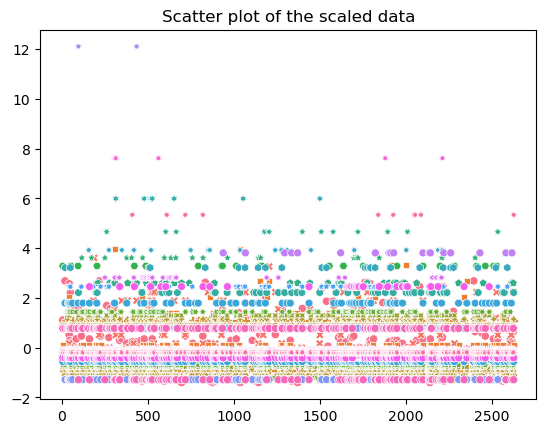

In [42]:
sns.scatterplot(scaled_test_set[scaled_test_set.columns[1:]], legend=False)
plt.title("Scatter plot of the scaled data")

Lets use the elbow method to find the best n_clusters for implementing the Kmeans algorithm

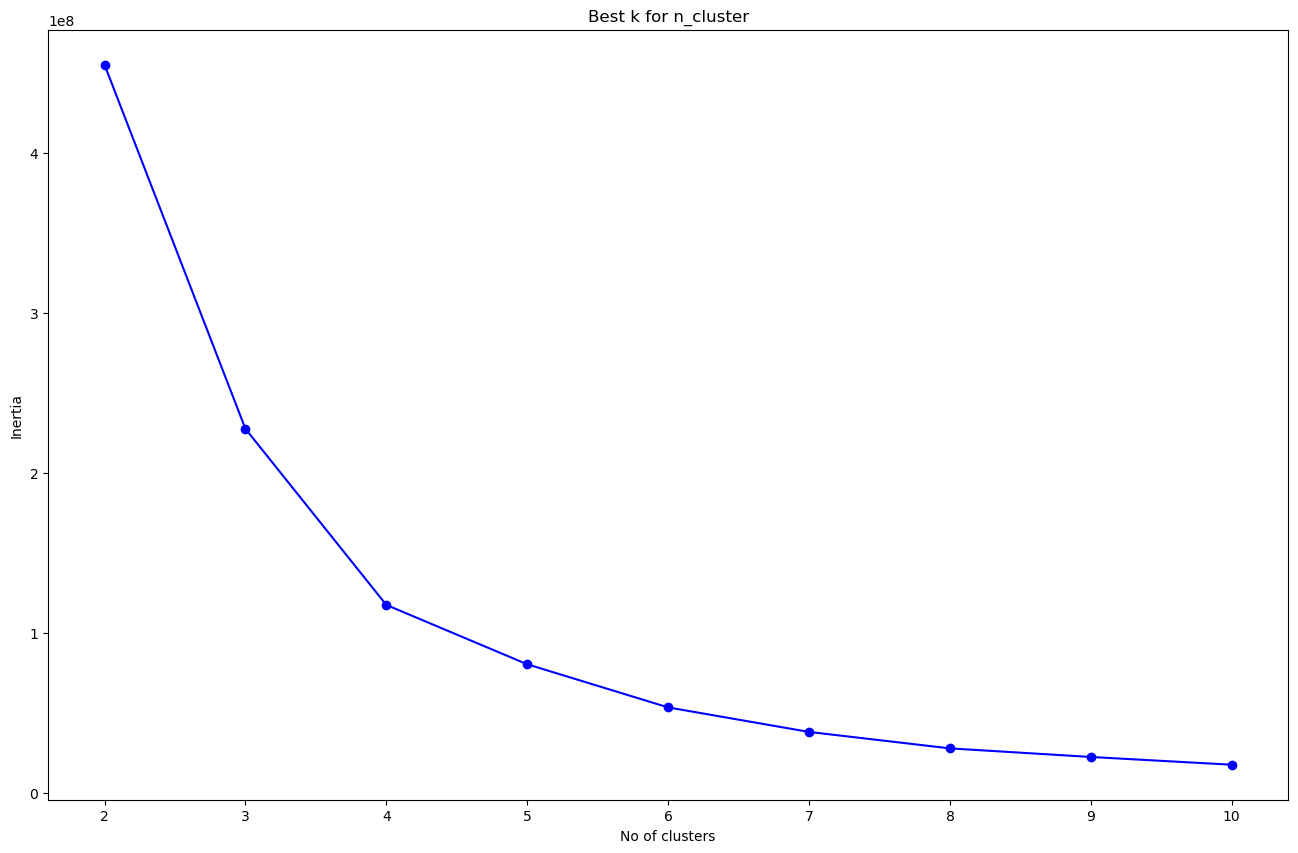

In [43]:
# import os
# os.environ["OMP_NUM_THREADS"] = '2'

from sklearn.cluster import KMeans


def KMeans_k_plot(df):
    n_cluster = range(2,11)
    inertia = []
    
    for i in n_cluster:    
        kmeans = KMeans(n_clusters = i, random_state=42)
#         kmeans.fit(df)
        kmeans.fit_predict(df)
        inertia.append(kmeans.inertia_)
    
    
    plt.figure(figsize = (16,10))
    plt.plot(n_cluster, inertia, 'bo-')
    plt.xlabel("No of clusters")
    plt.ylabel("Inertia")
    plt.title("Best k for n_cluster")
    

KMeans_k_plot(scaled_test_set)




We can see that the best k for the clustering is 4 which aligns perfectly for our problem statement since we need to divide the cistomers into 4 segments

Lets also plot the s score

In [44]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_transform(scaled_test_set)

silhouette_score(scaled_test_set, kmeans.labels_)


0.5911276176906769

# Plotting the Silhouette score

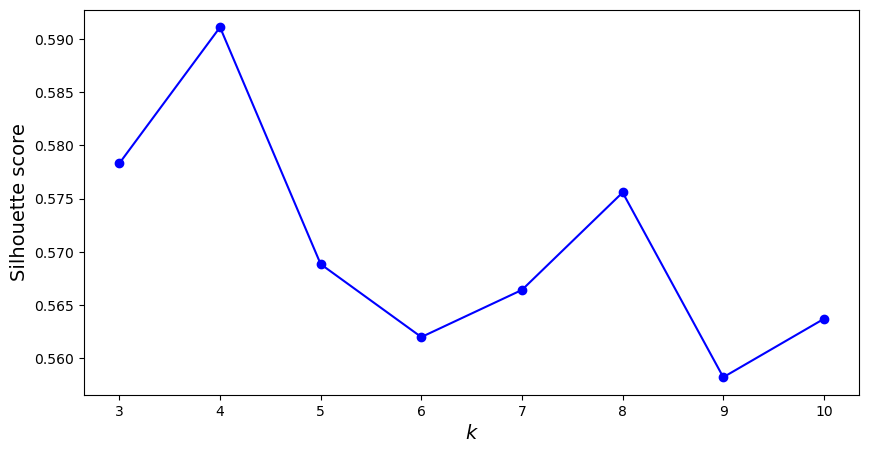

In [45]:
def plot_silhouette_scores(df):
    
    n_cluster = range(3,11)
    silhouette_scores = []
    
    for i in n_cluster:    
        kmeans = KMeans(n_clusters = i, random_state=42)
#         kmeans.fit(df)
        kmeans.fit_predict(df)
        silhouette_scores.append(silhouette_score(df, kmeans.labels_))

    plt.figure(figsize=(10, 5))
    plt.plot(n_cluster, silhouette_scores, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Silhouette score", fontsize=14)
    plt.show()
#   save_fig("silhouette_score_vs_k_plot")


plot_silhouette_scores(scaled_test_set)

Now that we have a resonable idea of our number of clusters, which is ,  lets start creating these clusters and label our testing data accordingly


# Lets go ahead and fit the K-means model to our dataset 

In [46]:
def fit_k_means_model(df):
    kmeans = KMeans(n_clusters=4, random_state=42)
    y_pred = kmeans.fit_predict(df)
    df['Segmentation'] = y_pred
    return df


clustered_data = fit_k_means_model(scaled_test_set) 
clustered_data

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
6,459005,1.110490,0.857407,0.094538,-0.906084,0.906084,-0.869455,0.869455,-0.771100,0.771100,...,-0.407441,0.782318,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317,1
19,459045,2.684624,-0.517534,0.738295,1.103651,-1.103651,-0.869455,0.869455,-0.771100,0.771100,...,-0.407441,-1.278252,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317,1
32,459090,-0.638547,-0.517534,-0.549220,-0.906084,0.906084,1.150145,-1.150145,1.296849,-1.296849,...,-0.407441,0.782318,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317,1
38,459116,1.052189,-0.173799,1.382053,-0.906084,0.906084,-0.869455,0.869455,-0.771100,0.771100,...,-0.407441,-1.278252,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317,1
43,459121,0.527478,0.169937,2.025810,1.103651,-1.103651,-0.869455,0.869455,-0.771100,0.771100,...,-0.407441,-1.278252,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,467913,0.352574,0.169937,-1.192977,-0.906084,0.906084,-0.869455,0.869455,-0.771100,0.771100,...,-0.407441,0.782318,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317,0
2612,467930,0.177671,0.513672,-0.549220,-0.906084,0.906084,-0.869455,0.869455,-0.771100,0.771100,...,-0.407441,-1.278252,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317,0
2616,467938,0.235972,0.857407,-1.192977,-0.906084,0.906084,-0.869455,0.869455,-0.771100,0.771100,...,-0.407441,0.782318,-0.082619,3.811340,-0.3549,-0.407441,-0.131306,-1.287501,-0.187317,0
2624,467960,0.644081,0.000000,-0.549220,1.103651,-1.103651,1.150145,-1.150145,-0.771100,0.771100,...,-0.407441,0.782318,-0.082619,-0.262375,-0.3549,-0.407441,-0.131306,0.776699,-0.187317,0


In [47]:
clustered_data.Segmentation.value_counts()

1    93
3    80
2    62
0    60
Name: Segmentation, dtype: int64

# Lets clean up our train data


In [48]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [49]:
data.shape


(8068, 11)

In [50]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Lets begin by separating the numerical atributes from the categorical attributes like we did before for our testing sets:


In [51]:
numerical_train = data.select_dtypes(include=[np.number])

In [52]:
# Lets replace the missing values for all attributes with the attribute mean
imputed_numerical_train = replace_missing_values(numerical_train)
imputed_numerical_train.isnull().sum()

ID                 0
Age                0
Work_Experience    0
Family_Size        0
dtype: int64

In [53]:
categorical_train = data.select_dtypes(exclude=[np.number])
categorical_train.isnull().sum()

Gender              0
Ever_Married      140
Graduated          78
Profession        124
Spending_Score      0
Var_1              76
Segmentation        0
dtype: int64

In [54]:
imputed_categorical_train = replace_categorical_missing_vals(categorical_train)
imputed_categorical_train.isnull().sum()

Gender            0
Ever_Married      0
Graduated         0
Profession        0
Spending_Score    0
Var_1             0
Segmentation      0
dtype: int64

In [55]:
final_train_set = pd.concat([imputed_numerical_train, imputed_categorical_train], axis=1)
final_train_set

,ID,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,462809,22,1.000000,4.0,Male,No,No,Healthcare,Low,Cat_4,D
1,462643,38,2.641663,3.0,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,466315,67,1.000000,1.0,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,461735,67,0.000000,2.0,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,462669,40,2.641663,6.0,Female,Yes,Yes,Entertainment,High,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,22,0.000000,7.0,Male,No,No,Artist,Low,Cat_1,D
8064,464685,35,3.000000,4.0,Male,No,No,Executive,Low,Cat_4,D
8065,465406,33,1.000000,1.0,Female,No,Yes,Healthcare,Low,Cat_6,D
8066,467299,27,1.000000,4.0,Female,No,Yes,Healthcare,Low,Cat_6,B


In [56]:
final_train_set.isnull().sum()

ID                 0
Age                0
Work_Experience    0
Family_Size        0
Gender             0
Ever_Married       0
Graduated          0
Profession         0
Spending_Score     0
Var_1              0
Segmentation       0
dtype: int64

In [57]:
final_train_set.shape

(8068, 11)

Lets create dummies for the categorical columns:

In [58]:
train_set_encoded = pd.get_dummies(final_train_set, columns=["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"])

In [59]:
train_set_encoded

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,22,1.000000,4.0,D,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,462643,38,2.641663,3.0,A,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,466315,67,1.000000,1.0,B,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,461735,67,0.000000,2.0,B,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,462669,40,2.641663,6.0,A,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,22,0.000000,7.0,D,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,0
8064,464685,35,3.000000,4.0,D,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
8065,465406,33,1.000000,1.0,D,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
8066,467299,27,1.000000,4.0,B,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [60]:
train_set_encoded.shape

(8068, 30)

In [61]:
train_set_encoded.isnull().sum()

ID                          0
Age                         0
Work_Experience             0
Family_Size                 0
Segmentation                0
Gender_Female               0
Gender_Male                 0
Ever_Married_No             0
Ever_Married_Yes            0
Graduated_No                0
Graduated_Yes               0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Spending_Score_Average      0
Spending_Score_High         0
Spending_Score_Low          0
Var_1_Cat_1                 0
Var_1_Cat_2                 0
Var_1_Cat_3                 0
Var_1_Cat_4                 0
Var_1_Cat_5                 0
Var_1_Cat_6                 0
Var_1_Cat_7                 0
dtype: int64

In [62]:
train_set_encoded.ID.duplicated().sum()

0

Lets drop the ID and the Segmentation columns so we can scale the data for machine learning models:
    

In [63]:
def scaler(df):
    attributes = df.columns
    scaler = StandardScaler()
    for i in attributes:
        scaler.fit(df[[i]])
        df[i] = scaler.transform(df[[i]])
    return df


unscaled_train_set = train_set_encoded.drop(['ID', 'Segmentation'], axis=1)
scaled_train_set = scaler(unscaled_train_set)

scaled_train_set


,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-1.284623,-0.508763,0.767001,-0.909164,0.909164,1.206653,-1.206653,1.29219,-1.29219,-0.697400,...,-0.569144,-0.421268,0.808676,-0.129465,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657
1,-0.327151,0.000000,0.099972,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,-0.697400,...,1.757024,-0.421268,-1.236590,-0.129465,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657
2,1.408268,-0.508763,-1.234085,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,-0.697400,...,-0.569144,-0.421268,0.808676,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657
3,1.408268,-0.818671,-0.567056,-0.909164,0.909164,-0.828738,0.828738,-0.77388,0.77388,-0.697400,...,-0.569144,2.373788,-1.236590,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657
4,-0.207467,0.000000,2.101059,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,-0.697400,...,-0.569144,2.373788,-1.236590,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,-1.284623,-0.818671,2.768088,-0.909164,0.909164,1.206653,-1.206653,1.29219,-1.29219,1.433897,...,-0.569144,-0.421268,0.808676,7.724096,-0.23493,-0.336811,-0.395018,-0.103187,-1.389085,-0.160657
8064,-0.506677,0.111051,0.767001,-0.909164,0.909164,1.206653,-1.206653,1.29219,-1.29219,-0.697400,...,-0.569144,-0.421268,0.808676,-0.129465,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657
8065,-0.626361,-0.508763,-1.234085,1.099912,-1.099912,1.206653,-1.206653,-0.77388,0.77388,-0.697400,...,-0.569144,-0.421268,0.808676,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657
8066,-0.985413,-0.508763,0.767001,1.099912,-1.099912,1.206653,-1.206653,-0.77388,0.77388,-0.697400,...,-0.569144,-0.421268,0.808676,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657


Lets add the two columns back to the scaled train set i.e 'ID' and 'Segmentation'

In [64]:
# train_set_v1 = pd.concat([train_set_encoded])
scaled_train_df = pd.concat([train_set_encoded.ID, scaled_train_set, train_set_encoded.Segmentation], axis=1)
key = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
scaled_train_df.Segmentation = scaled_train_df.Segmentation.map(key)
scaled_train_df.head()

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,462809,-1.284623,-0.508763,0.767001,-0.909164,0.909164,1.206653,-1.206653,1.29219,-1.29219,...,-0.421268,0.808676,-0.129465,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657,3
1,462643,-0.327151,0.000000,0.099972,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,...,-0.421268,-1.236590,-0.129465,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657,0
2,466315,1.408268,-0.508763,-1.234085,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,...,-0.421268,0.808676,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,1
3,461735,1.408268,-0.818671,-0.567056,-0.909164,0.909164,-0.828738,0.828738,-0.77388,0.77388,...,2.373788,-1.236590,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,1
4,462669,-0.207467,0.000000,2.101059,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,...,2.373788,-1.236590,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,0


In [65]:
scaled_train_df.shape

(8068, 30)

In [66]:
scaled_train_df.isnull().sum()

ID                          0
Age                         0
Work_Experience             0
Family_Size                 0
Gender_Female               0
Gender_Male                 0
Ever_Married_No             0
Ever_Married_Yes            0
Graduated_No                0
Graduated_Yes               0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Spending_Score_Average      0
Spending_Score_High         0
Spending_Score_Low          0
Var_1_Cat_1                 0
Var_1_Cat_2                 0
Var_1_Cat_3                 0
Var_1_Cat_4                 0
Var_1_Cat_5                 0
Var_1_Cat_6                 0
Var_1_Cat_7                 0
Segmentation                0
dtype: int64

Now that both our train and test sets have been cleaned, lets combine them together and perform muti classification using machine learning models

In [67]:
train_test_merged = pd.concat([scaled_train_df, clustered_data])
train_test_merged

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,462809,-1.284623,-0.508763,0.767001,-0.909164,0.909164,1.206653,-1.206653,1.29219,-1.29219,...,-0.421268,0.808676,-0.129465,-0.234930,-0.336811,2.531528,-0.103187,-1.389085,-0.160657,3
1,462643,-0.327151,0.000000,0.099972,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,...,-0.421268,-1.236590,-0.129465,-0.234930,-0.336811,2.531528,-0.103187,-1.389085,-0.160657,0
2,466315,1.408268,-0.508763,-1.234085,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,...,-0.421268,0.808676,-0.129465,-0.234930,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,1
3,461735,1.408268,-0.818671,-0.567056,-0.909164,0.909164,-0.828738,0.828738,-0.77388,0.77388,...,2.373788,-1.236590,-0.129465,-0.234930,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,1
4,462669,-0.207467,0.000000,2.101059,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,...,2.373788,-1.236590,-0.129465,-0.234930,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,467913,0.352574,0.169937,-1.192977,-0.906084,0.906084,-0.869455,0.869455,-0.77110,0.77110,...,-0.407441,0.782318,-0.082619,-0.262375,-0.354900,-0.407441,-0.131306,0.776699,-0.187317,0
2612,467930,0.177671,0.513672,-0.549220,-0.906084,0.906084,-0.869455,0.869455,-0.77110,0.77110,...,-0.407441,-1.278252,-0.082619,-0.262375,-0.354900,-0.407441,-0.131306,0.776699,-0.187317,0
2616,467938,0.235972,0.857407,-1.192977,-0.906084,0.906084,-0.869455,0.869455,-0.77110,0.77110,...,-0.407441,0.782318,-0.082619,3.811340,-0.354900,-0.407441,-0.131306,-1.287501,-0.187317,0
2624,467960,0.644081,0.000000,-0.549220,1.103651,-1.103651,1.150145,-1.150145,-0.77110,0.77110,...,-0.407441,0.782318,-0.082619,-0.262375,-0.354900,-0.407441,-0.131306,0.776699,-0.187317,0


In [68]:
train_test_merged.isnull().sum()

ID                          0
Age                         0
Work_Experience             0
Family_Size                 0
Gender_Female               0
Gender_Male                 0
Ever_Married_No             0
Ever_Married_Yes            0
Graduated_No                0
Graduated_Yes               0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Spending_Score_Average      0
Spending_Score_High         0
Spending_Score_Low          0
Var_1_Cat_1                 0
Var_1_Cat_2                 0
Var_1_Cat_3                 0
Var_1_Cat_4                 0
Var_1_Cat_5                 0
Var_1_Cat_6                 0
Var_1_Cat_7                 0
Segmentation                0
dtype: int64

In [69]:
train_test_merged.ID.duplicated().sum()

0

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_test_merged['ID'] = scaler.fit_transform(train_test_merged[['ID']])
train_test_merged.head()


,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,-0.256191,-1.284623,-0.508763,0.767001,-0.909164,0.909164,1.206653,-1.206653,1.29219,-1.29219,...,-0.421268,0.808676,-0.129465,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657,3
1,-0.320106,-0.327151,0.000000,0.099972,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,...,-0.421268,-1.236590,-0.129465,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657,0
2,1.093717,1.408268,-0.508763,-1.234085,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,...,-0.421268,0.808676,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,1
3,-0.669711,1.408268,-0.818671,-0.567056,-0.909164,0.909164,-0.828738,0.828738,-0.77388,0.77388,...,2.373788,-1.236590,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,1
4,-0.310095,-0.207467,0.000000,2.101059,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,...,2.373788,-1.236590,-0.129465,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,0


Lets split this merged data set into 80% train and 20% test

In [71]:
from sklearn.model_selection import train_test_split
X = train_test_merged.drop('Segmentation', axis=1)
y = train_test_merged['Segmentation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lets check the shape of our train and test sets

In [72]:
X_train.shape

(6690, 29)

In [73]:
y_train.shape

(6690,)

In [74]:
X_test.shape

(1673, 29)

In [75]:
y_test.shape

(1673,)

# Lets train a Linear support vector classifier:

In [76]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
Linear_svc_clf = LinearSVC(dual=False)
Linear_svc_clf.fit(X_train, y_train)
Linear_svc_clf.score(X_train, y_train)

0.5068759342301943

In [77]:
y_predict = Linear_svc_clf.predict(X_test)

In [78]:
accuracy_score(y_predict, y_test)

0.49252839210998206

# Lets implement a hard voting classifier:

In [79]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

voting_clf = VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                                         ('rf', RandomForestClassifier(random_state=42)),
                                         ('svc', SVC(random_state=42))])

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [80]:
# .score of each indicidual classifiers of the VotingClassifier:

for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.5002988643156007
rf = 0.5242080095636581
svc = 0.5104602510460251


In [81]:
voting_clf.score(X_test, y_test)

0.5152420800956365

In [91]:
y_voting_clf_pred = voting_clf.predict(X_test) 
print("The accuracy score of hard voting classifier is: ", accuracy_score(y_voting_clf_pred, y_test))

The accuracy score of hard voting classifier is:  0.5331739390316796


# Lets implementing a soft voting classifier:

In [83]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)


0.5331739390316796

In [84]:
y_pred_voting_clf = voting_clf.predict(X_test)
print("The accuracy score of soft voting classifier is:", accuracy_score(y_test, y_pred_voting_clf))

The accuracy score of soft voting classifier is: 0.5331739390316796


# Lets create a random forest classifier:

In [85]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=50,
                                 n_jobs=-1, random_state=42)  # n_estimators is the number of trees (rf optimized for decision trees)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
rf_accuracy_score = accuracy_score(y_test, y_pred_rf)

print("The accuracy score of RandomForest classifier is: ",rf_accuracy_score)

The accuracy score of RandomForest classifier is:  0.5499103407053197


# Lets Create a bagging classifier using a decision tree classifier:

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# oob_score=True  requests an automatic oob evaluation after training on samples m with replacement m is the size of the training set


bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.5319880418535127

In [87]:
from sklearn.metrics import accuracy_score

y_pred_bag_clf = bag_clf.predict(X_test)
print("The accuracy score of bagging classifier is: ", accuracy_score(y_test, y_pred_bag_clf))  

The accuracy score of bagging classifier is:  0.5188284518828452


# Looks like we beat the baseline...the top performers for this competition were found with acuracy scores ranging between 0.47 to 0.53

## Link can be found here:  

### take a look at their accuracy scores in their notebook :)